In [146]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

In [56]:
df = pd.read_csv("../Data/Assignment3-TrainingData.csv")

In [3]:
df.head()

,row ID,BATHRM,HF_BATHRM,HEAT,HEAT_D,AC,NUM_UNITS,ROOMS,BEDRM,AYB,...,ROOF,ROOF_D,INTWALL,INTWALL_D,KITCHENS,FIREPLACES,USECODE,LANDAREA,GIS_LAST_MOD_DTTM,QUALIFIED
0,Row0,3.0,1.0,7.0,Warm Cool,Y,2.0,11.0,5.0,1898.0,...,2.0,Built Up,6.0,Hardwood,2.0,4.0,24,1680,2018-07-22T18:01:43.000Z,0
1,Row1,3.0,1.0,13.0,Hot Water Rad,Y,2.0,9.0,5.0,1910.0,...,2.0,Built Up,6.0,Hardwood,2.0,4.0,24,1680,2018-07-22T18:01:43.000Z,1
2,Row2,2.0,1.0,7.0,Warm Cool,Y,1.0,11.0,3.0,1913.0,...,13.0,Neopren,6.0,Hardwood,1.0,0.0,13,2032,2018-07-22T18:01:43.000Z,0
3,Row3,3.0,2.0,13.0,Hot Water Rad,Y,1.0,10.0,5.0,1913.0,...,2.0,Built Up,6.0,Hardwood,1.0,4.0,11,2196,2018-07-22T18:01:43.000Z,1
4,Row4,3.0,1.0,7.0,Warm Cool,Y,2.0,7.0,3.0,1908.0,...,2.0,Built Up,6.0,Hardwood,2.0,1.0,24,1424,2018-07-22T18:01:43.000Z,1


In [4]:
df['PRICE'].describe()

count    6.150100e+04
mean     3.841263e+05
std      5.777721e+05
min      0.000000e+00
25%      0.000000e+00
50%      2.380000e+05
75%      5.800000e+05
max      2.510000e+07
Name: PRICE, dtype: float64

In [27]:
df[df['AYB'] >= 1000].describe()

,BATHRM,HF_BATHRM,HEAT,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,...,GRADE,CNDTN,EXTWALL,ROOF,INTWALL,KITCHENS,FIREPLACES,USECODE,LANDAREA,QUALIFIED
count,74830.000000,74829.000000,74830.000000,74830.000000,74818.000000,74826.000000,74850.000000,34496.000000,74850.000000,74798.000000,...,74830.000000,74830.000000,74830.000000,74830.000000,74830.000000,74829.000000,74829.000000,74850.000000,74850.000000,74850.000000
mean,2.036068,0.608427,7.644688,1.196392,7.358336,3.373386,1934.036166,2000.962807,1965.772625,2.096250,...,4.269611,3.526754,13.357156,3.993572,6.145623,1.217857,0.620134,13.122578,3415.570648,0.431102
std,1.067336,0.617166,5.037895,0.594016,2.352820,1.168760,28.386527,18.280937,35.367191,3.340495,...,1.369556,0.715313,3.935611,3.351570,1.959124,0.625073,0.889625,3.979128,5507.725010,0.495234
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1754.000000,20.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,1.000000,6.000000,3.000000,1914.000000,1993.000000,1955.000000,2.000000,...,3.000000,3.000000,14.000000,1.000000,6.000000,1.000000,0.000000,11.000000,1600.000000,0.000000
50%,2.000000,1.000000,7.000000,1.000000,7.000000,3.000000,1930.000000,2006.000000,1964.000000,2.000000,...,4.000000,3.000000,14.000000,2.000000,6.000000,1.000000,0.000000,12.000000,2369.000000,0.000000
75%,3.000000,1.000000,13.000000,1.000000,8.000000,4.000000,1947.000000,2011.000000,1970.000000,2.000000,...,5.000000,4.000000,14.000000,6.000000,6.000000,1.000000,1.000000,13.000000,4200.000000,1.000000
max,24.000000,11.000000,13.000000,6.000000,101.000000,54.000000,2019.000000,2019.000000,2018.000000,826.000000,...,12.000000,6.000000,24.000000,15.000000,11.000000,44.000000,13.000000,81.000000,691817.000000,1.000000


In [37]:
df[df['YR_RMDL'] <= 1500]

,row ID,BATHRM,HF_BATHRM,HEAT,HEAT_D,AC,NUM_UNITS,ROOMS,BEDRM,AYB,...,ROOF,ROOF_D,INTWALL,INTWALL_D,KITCHENS,FIREPLACES,USECODE,LANDAREA,GIS_LAST_MOD_DTTM,QUALIFIED
39771,Row39771,1.0,1.0,1.0,Forced Air,Y,1.0,8.0,4.0,1929.0,...,2.0,Built Up,6.0,Hardwood,1.0,1.0,13,2380,2018-07-22T18:01:43.000Z,1


In [5]:
df.corr()

,BATHRM,HF_BATHRM,HEAT,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,...,GRADE,CNDTN,EXTWALL,ROOF,INTWALL,KITCHENS,FIREPLACES,USECODE,LANDAREA,QUALIFIED
BATHRM,1.000000,0.133854,-0.123863,0.401933,0.639187,0.591457,0.039253,0.141028,0.404516,0.036751,...,0.481718,0.368440,0.038598,0.149227,0.094859,0.417169,0.396841,0.337570,0.243874,0.172837
HF_BATHRM,0.133854,1.000000,-0.153487,-0.148496,0.133625,0.151910,0.058672,0.042418,0.352011,0.032086,...,0.299643,0.275587,0.042003,0.094562,0.067505,-0.130218,0.268607,-0.088721,0.140253,0.103165
HEAT,-0.123863,-0.153487,1.000000,0.065051,0.046725,0.019240,-0.094046,-0.185933,-0.342445,0.001749,...,0.029137,-0.323389,-0.045628,0.120604,-0.130751,0.059106,-0.000740,0.003217,-0.017612,-0.178805
NUM_UNITS,0.401933,-0.148496,0.065051,1.000000,0.509763,0.310772,-0.017600,-0.011322,-0.067765,0.016098,...,-0.027030,-0.057202,0.052014,-0.017631,0.007507,0.922181,-0.029752,0.798941,-0.041283,-0.006023
ROOMS,0.639187,0.133625,0.046725,0.509763,1.000000,0.650494,0.012153,0.014529,0.161953,0.032851,...,0.340703,0.148680,0.031834,0.142726,0.030074,0.505697,0.288145,0.374391,0.238464,0.019572
BEDRM,0.591457,0.151910,0.019240,0.310772,0.650494,1.000000,0.001027,0.054708,0.182791,0.033675,...,0.347175,0.158620,0.002032,0.131225,0.046293,0.322496,0.281702,0.265185,0.227244,0.046003
AYB,0.039253,0.058672,-0.094046,-0.017600,0.012153,0.001027,1.000000,0.019303,0.079264,-0.001862,...,0.008977,0.091068,0.033400,-0.056626,0.052775,-0.022878,-0.016599,-0.039415,0.016966,0.016861
YR_RMDL,0.141028,0.042418,-0.185933,-0.011322,0.014529,0.054708,0.019303,1.000000,0.273857,-0.001985,...,-0.071638,0.328010,0.012710,-0.043712,0.120827,0.005015,-0.058005,-0.005573,-0.003903,0.231880
EYB,0.404516,0.352011,-0.342445,-0.067765,0.161953,0.182791,0.079264,0.273857,1.000000,0.035155,...,0.425500,0.617508,0.021773,-0.064450,0.176379,-0.047414,0.214860,0.020170,0.047423,0.130451
STORIES,0.036751,0.032086,0.001749,0.016098,0.032851,0.033675,-0.001862,-0.001985,0.035155,1.000000,...,0.054531,0.030482,0.009715,0.022255,0.000848,0.018141,0.029274,0.018003,-0.009319,0.012039


In [21]:
#There are 20 rows that have between 10% to 60% missing values
print(len(df.loc[df.isnull().mean(axis=1) >= 0.1]))
print(len(df.loc[df.isnull().mean(axis=1) >= 0.6]))
print(len(df.loc[df.isnull().mean(axis=1) < 0.6]))

20
20
74987


In [133]:
def zscore(A, Mean, StdDev):
    return((A-Mean)/StdDev)

In [174]:
df = pd.read_csv("../Data/Assignment3-TrainingData.csv")

AYB_EYB_DIF = sum(df[df['AYB'] > 1500]['EYB'] - df[df['AYB'] > 1500]['AYB'])/len(df[df['AYB'] > 1500])

In [175]:
#Remove the 20 rows with significant missing values
df = df.loc[df.isnull().mean(axis=1) < 0.6]

#147 rows have an AYB that is less than 1500.
#We are going to use the average difference between EYB and AYB to calculate what the AYB should be for these properties from their EYB value. Also round the keep the numbers the same.
df.loc[df['AYB'] <= 1500, 'AYB'] = round(df[df['AYB'] <= 1500]['EYB'] - AYB_EYB_DIF)

Discretise_List = []
for i in df['AYB']:
    if i <= 1800:
        val = "Very Old"
    elif i <= 1950:
        val = "Old"
    elif i <= 2000:
        val = "New"
    else:
        val = "Very New"
    Discretise_List.append(val)
df['AYB'] = Discretise_List

#Condition Binarised
Binarise_List = []
for i in df['CNDTN_D']:
    if i in ("Good", "Very Good", "Excellent"):
        val = 1
    else:
        val = 0
    Binarise_List.append(val)
df['CNDTN_D'] = Binarise_List

#We know from df.describe that the YR_RMDL column is missing 50% of values. This makes sense as they have not been remodelled.

#We know that approximately 50% of price values are either null or $0 - We are going to use the average price for these values
df.loc[df['PRICE'].isnull(), 'PRICE'] = 0
mean_price = round(df.loc[df['PRICE'] != 0, 'PRICE'].mean())
df.loc[df['PRICE'] == 0, 'PRICE'] = mean_price
df['PRICE'] = zscore(df['PRICE'], df['PRICE'].mean(), df['PRICE'].std())

#Write the updated data to a csv
df.to_csv(r'../Data/Clean_Data.csv', index = False)

In [178]:
df = pd.read_csv("../Data/Assignment3-UnknownData.csv")

#Do not remove the rows with missing data this time

#147 rows have an AYB that is less than 1500.
#We are going to use the average difference between EYB and AYB to calculate what the AYB should be for these properties from their EYB value. Also round the keep the numbers the same.
df.loc[df['AYB'] <= 1500, 'AYB'] = round(df[df['AYB'] <= 1500]['EYB'] - AYB_EYB_DIF)

Discretise_List = []
for i in df['AYB']:
    if i <= 1800:
        val = "Very Old"
    elif i <= 1950:
        val = "Old"
    elif i <= 2000:
        val = "New"
    else:
        val = "Very New"
    Discretise_List.append(val)
df['AYB'] = Discretise_List

#Condition Binarised
Binarise_List = []
for i in df['CNDTN_D']:
    if i in ("Good", "Very Good", "Excellent"):
        val = 1
    else:
        val = 0
    Binarise_List.append(val)
df['CNDTN_D'] = Binarise_List

#We know from df.describe that the YR_RMDL column is missing 50% of values. This makes sense as they have not been remodelled.

#We know that approximately 50% of price values are either null or $0 - We are going to use the average price for these values
df.loc[df['PRICE'].isnull(), 'PRICE'] = 0
mean_price = round(df.loc[df['PRICE'] != 0, 'PRICE'].mean())
df.loc[df['PRICE'] == 0, 'PRICE'] = mean_price
df['PRICE'] = zscore(df['PRICE'], df['PRICE'].mean(), df['PRICE'].std())

#Write the updated data to a csv
df.to_csv(r'../Data/Clean_Pred_Data.csv', index = False)

In [179]:
df.head()

,row ID,BATHRM,HF_BATHRM,HEAT,HEAT_D,AC,NUM_UNITS,ROOMS,BEDRM,AYB,...,EXTWALL_D,ROOF,ROOF_D,INTWALL,INTWALL_D,KITCHENS,FIREPLACES,USECODE,LANDAREA,GIS_LAST_MOD_DTTM
0,Row0,4.0,0.0,7.0,Warm Cool,Y,2.0,8.0,4.0,Old,...,Common Brick,6.0,Metal- Sms,6.0,Hardwood,2.0,5.0,24,1680,2018-07-22T18:01:43.000Z
1,Row1,3.0,1.0,13.0,Hot Water Rad,Y,2.0,8.0,5.0,Old,...,Common Brick,2.0,Built Up,6.0,Hardwood,2.0,3.0,24,1680,2018-07-22T18:01:43.000Z
2,Row2,1.0,0.0,7.0,Warm Cool,Y,2.0,5.0,2.0,Old,...,Common Brick,6.0,Metal- Sms,6.0,Hardwood,2.0,0.0,24,1261,2018-07-22T18:01:43.000Z
3,Row3,3.0,1.0,13.0,Hot Water Rad,Y,2.0,8.0,4.0,Old,...,Common Brick,6.0,Metal- Sms,6.0,Hardwood,2.0,1.0,24,1627,2018-07-22T18:01:43.000Z
4,Row4,1.0,1.0,13.0,Hot Water Rad,Y,1.0,6.0,2.0,Old,...,Common Brick,2.0,Built Up,6.0,Hardwood,1.0,0.0,11,1424,2018-07-22T18:01:43.000Z


In [166]:
#Write the updated data to a csv
df.to_csv(r'../Data/Clean_Data.csv', index = False)

In [62]:
df['PRICE'].min()

0.0

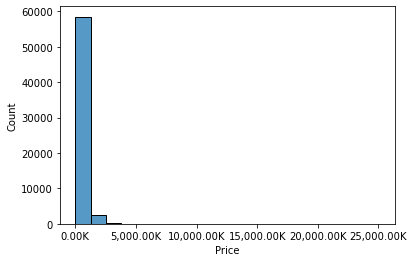

In [65]:
fig = sns.histplot(df['PRICE'], bins=20)
xlabels = ['{:,.2f}'.format(x) + 'K' for x in fig.get_xticks()/1000]
fig.set_xticklabels(xlabels)
plt.xlabel("Price")
plt.show()
plt.clf()

In [155]:
df[(df['PRICE']>0) & (df['PRICE']<1000000)]

,row ID,BATHRM,HF_BATHRM,HEAT,HEAT_D,AC,NUM_UNITS,ROOMS,BEDRM,AYB,...,ROOF,ROOF_D,INTWALL,INTWALL_D,KITCHENS,FIREPLACES,USECODE,LANDAREA,GIS_LAST_MOD_DTTM,QUALIFIED
11,Row11,3.0,1.0,13.0,Hot Water Rad,Y,1.0,14.0,5.0,1880.0,...,2.0,Built Up,6.0,Hardwood,1.0,3.0,13,2090,2018-07-22T18:01:43.000Z,0
17,Row17,2.0,1.0,1.0,Forced Air,Y,1.0,6.0,2.0,1890.0,...,6.0,Metal- Sms,6.0,Hardwood,1.0,3.0,11,1853,2018-07-22T18:01:43.000Z,1
20,Row20,2.0,2.0,7.0,Warm Cool,Y,2.0,8.0,4.0,1800.0,...,2.0,Built Up,3.0,Wood Floor,2.0,0.0,24,1853,2018-07-22T18:01:43.000Z,0
25,Row25,3.0,1.0,1.0,Forced Air,Y,2.0,10.0,5.0,1890.0,...,2.0,Built Up,3.0,Wood Floor,2.0,0.0,24,1853,2018-07-22T18:01:43.000Z,0
27,Row27,2.0,1.0,1.0,Forced Air,N,2.0,8.0,3.0,1976.0,...,6.0,Metal- Sms,3.0,Wood Floor,2.0,0.0,23,1853,2018-07-22T18:01:43.000Z,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74990,Row74990,3.0,0.0,1.0,Forced Air,N,3.0,12.0,6.0,1954.0,...,1.0,Comp Shingle,6.0,Hardwood,3.0,0.0,23,4374,2018-07-22T18:01:43.000Z,1
74998,Row74998,3.0,0.0,1.0,Forced Air,N,3.0,13.0,8.0,1953.0,...,2.0,Built Up,6.0,Hardwood,3.0,0.0,23,5311,2018-07-22T18:01:43.000Z,0
75000,Row75000,2.0,0.0,1.0,Forced Air,Y,2.0,10.0,4.0,1953.0,...,2.0,Built Up,6.0,Hardwood,2.0,0.0,23,5302,2018-07-22T18:01:43.000Z,0
75004,Row75004,2.0,0.0,1.0,Forced Air,N,2.0,10.0,5.0,1953.0,...,2.0,Built Up,6.0,Hardwood,2.0,0.0,23,5348,2018-07-22T18:01:43.000Z,0


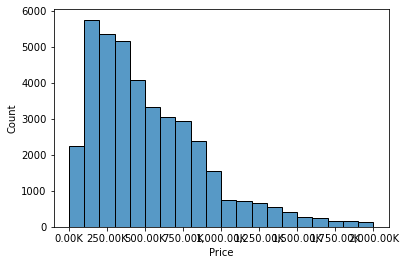

In [160]:
fig = sns.histplot(df[(df['PRICE']>0) & (df['PRICE']<2000000)]['PRICE'], bins=20)
xlabels = ['{:,.2f}'.format(x) + 'K' for x in fig.get_xticks()/1000]
fig.set_xticklabels(xlabels)
plt.xlabel("Price")
plt.show()
plt.clf()

In [66]:
print('Price less than $3M: ' + str(len(df[df['PRICE'] < 3000000])))
print('Price greater than or equal to $1.5M: ' + str(len(df[df['PRICE'] >= 1500000])))
print('No Price: ' + str(df['PRICE'].isnull().sum()))

Price less than $3M: 61195
Price greater than or equal to $1.5M: 1846
No Price: 13506


<Figure size 432x288 with 0 Axes>

In [71]:
df['SALEDATE'].max()

'2018-07-12T00:00:00.000Z'

In [81]:
df[pd.notnull(df['PRICE'])]['PRICE']

0              0.0
1        2100000.0
3        1950000.0
4        1430000.0
6              0.0
           ...    
74999          0.0
75000     185000.0
75004     100000.0
75005          0.0
75006     215000.0
Name: PRICE, Length: 61501, dtype: float64

In [87]:
df[df['PRICE']==0]

,row ID,BATHRM,HF_BATHRM,HEAT,HEAT_D,AC,NUM_UNITS,ROOMS,BEDRM,AYB,...,ROOF,ROOF_D,INTWALL,INTWALL_D,KITCHENS,FIREPLACES,USECODE,LANDAREA,GIS_LAST_MOD_DTTM,QUALIFIED
0,Row0,3.0,1.0,7.0,Warm Cool,Y,2.0,11.0,5.0,1898.0,...,2.0,Built Up,6.0,Hardwood,2.0,4.0,24,1680,2018-07-22T18:01:43.000Z,0
6,Row6,5.0,0.0,13.0,Hot Water Rad,Y,3.0,16.0,6.0,1905.0,...,6.0,Metal- Sms,6.0,Hardwood,3.0,0.0,24,2023,2018-07-22T18:01:43.000Z,0
10,Row10,3.0,1.0,13.0,Hot Water Rad,Y,2.0,10.0,4.0,1908.0,...,6.0,Metal- Sms,6.0,Hardwood,2.0,1.0,24,1424,2018-07-22T18:01:43.000Z,0
12,Row12,3.0,0.0,1.0,Forced Air,Y,2.0,12.0,3.0,1880.0,...,2.0,Built Up,6.0,Hardwood,2.0,1.0,24,2090,2018-07-22T18:01:43.000Z,0
14,Row14,3.0,0.0,7.0,Warm Cool,Y,2.0,10.0,4.0,1900.0,...,2.0,Built Up,11.0,Hardwood/Carp,2.0,5.0,24,1853,2018-07-22T18:01:43.000Z,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74976,Row74976,1.0,0.0,1.0,Forced Air,Y,1.0,4.0,2.0,1911.0,...,6.0,Metal- Sms,6.0,Hardwood,1.0,1.0,11,1733,2018-07-22T18:01:43.000Z,0
74980,Row74980,1.0,1.0,7.0,Warm Cool,Y,1.0,6.0,3.0,1975.0,...,2.0,Built Up,3.0,Wood Floor,1.0,0.0,11,1871,2018-07-22T18:01:43.000Z,0
74989,Row74989,2.0,0.0,13.0,Hot Water Rad,N,2.0,4.0,2.0,1951.0,...,2.0,Built Up,6.0,Hardwood,2.0,0.0,23,3129,2018-07-22T18:01:43.000Z,0
74999,Row74999,2.0,0.0,1.0,Forced Air,N,2.0,10.0,4.0,1953.0,...,2.0,Built Up,6.0,Hardwood,2.0,0.0,23,5195,2018-07-22T18:01:43.000Z,0


In [86]:
np.percentile(df[pd.notnull(df['PRICE'])]['PRICE'], 30)

0.0

In [110]:
for column_name in df.drop(['row ID', 'SALEDATE'], axis=1).columns:
    if df[column_name].dtype == object:
        for x in df[column_name].unique():
            if df[df[column_name] == x][column_name].value_counts() <= 100:
                print(x)
        #print(df[column_name].unique())

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [112]:
for column_name in df.drop(['row ID', 'SALEDATE'], axis=1).columns:
    if df[column_name].dtype == object:
        if df[column_name].value_counts() <= 100:
            print(column_name)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [147]:
for column_name in df.columns:
    if df[column_name].dtype == object:
        print(column_name)
        print(df[column_name].value_counts())

row ID
Row62500    1
Row65105    1
Row64721    1
Row53578    1
Row43196    1
           ..
Row30931    1
Row23085    1
Row65188    1
Row36798    1
Row56646    1
Name: row ID, Length: 74987, dtype: int64
HEAT_D
Hot Water Rad     30809
Forced Air        22646
Warm Cool         20195
Ht Pump             651
Wall Furnace        161
Water Base Brd      125
Gravity Furnac       98
Elec Base Brd        73
Air-Oil              73
Electric Rad         53
No Data              46
Air Exchng           25
Evp Cool             19
Ind Unit             13
Name: HEAT_D, dtype: int64
AC
Y    46601
N    28346
0       40
Name: AC, dtype: int64
SALEDATE
1900-01-01T00:00:00.000Z    15866
1999-04-01T00:00:00.000Z      145
2001-01-01T00:00:00.000Z      132
2006-10-12T00:00:00.000Z       47
2017-05-23T00:00:00.000Z       45
                            ...  
1992-12-07T00:00:00.000Z        1
1994-04-20T00:00:00.000Z        1
1977-04-28T00:00:00.000Z        1
1989-03-09T00:00:00.000Z        1
1992-01-03T00:00:00

In [132]:
for column_name in df.drop(['row ID', 'SALEDATE'], axis=1).columns:
    if df[column_name].dtype == object:
        print(column_name)
        print(df[df[column_name] == df[column_name].value_counts() < 100])

HEAT_D


ValueError: Can only compare identically-labeled Series objects

In [118]:
df[df['PRICE'] < 3000000]

,row ID,BATHRM,HF_BATHRM,HEAT,HEAT_D,AC,NUM_UNITS,ROOMS,BEDRM,AYB,...,ROOF,ROOF_D,INTWALL,INTWALL_D,KITCHENS,FIREPLACES,USECODE,LANDAREA,GIS_LAST_MOD_DTTM,QUALIFIED
0,Row0,3.0,1.0,7.0,Warm Cool,Y,2.0,11.0,5.0,1898.0,...,2.0,Built Up,6.0,Hardwood,2.0,4.0,24,1680,2018-07-22T18:01:43.000Z,0
1,Row1,3.0,1.0,13.0,Hot Water Rad,Y,2.0,9.0,5.0,1910.0,...,2.0,Built Up,6.0,Hardwood,2.0,4.0,24,1680,2018-07-22T18:01:43.000Z,1
3,Row3,3.0,2.0,13.0,Hot Water Rad,Y,1.0,10.0,5.0,1913.0,...,2.0,Built Up,6.0,Hardwood,1.0,4.0,11,2196,2018-07-22T18:01:43.000Z,1
4,Row4,3.0,1.0,7.0,Warm Cool,Y,2.0,7.0,3.0,1908.0,...,2.0,Built Up,6.0,Hardwood,2.0,1.0,24,1424,2018-07-22T18:01:43.000Z,1
6,Row6,5.0,0.0,13.0,Hot Water Rad,Y,3.0,16.0,6.0,1905.0,...,6.0,Metal- Sms,6.0,Hardwood,3.0,0.0,24,2023,2018-07-22T18:01:43.000Z,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74999,Row74999,2.0,0.0,1.0,Forced Air,N,2.0,10.0,4.0,1953.0,...,2.0,Built Up,6.0,Hardwood,2.0,0.0,23,5195,2018-07-22T18:01:43.000Z,0
75000,Row75000,2.0,0.0,1.0,Forced Air,Y,2.0,10.0,4.0,1953.0,...,2.0,Built Up,6.0,Hardwood,2.0,0.0,23,5302,2018-07-22T18:01:43.000Z,0
75004,Row75004,2.0,0.0,1.0,Forced Air,N,2.0,10.0,5.0,1953.0,...,2.0,Built Up,6.0,Hardwood,2.0,0.0,23,5348,2018-07-22T18:01:43.000Z,0
75005,Row75005,2.0,0.0,1.0,Forced Air,N,2.0,10.0,4.0,1953.0,...,2.0,Built Up,6.0,Hardwood,2.0,0.0,23,3466,2018-07-22T18:01:43.000Z,0


In [128]:
df[df > df.quantile(.02)]['HEAT_D']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
75002    NaN
75003    NaN
75004    NaN
75005    NaN
75006    NaN
Name: HEAT_D, Length: 75007, dtype: object